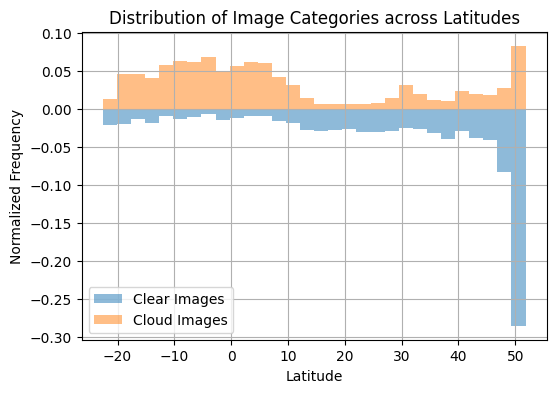

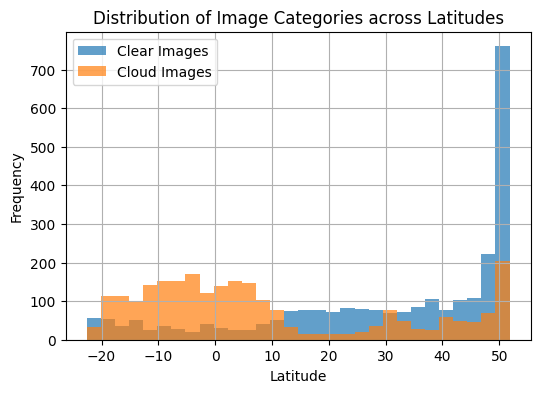

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the base directory containing 'Cloud' and 'Clear' folders and the metadata file
base_image_folder = 'ImageDataMay30'
metadata_file = os.path.join(base_image_folder, 'image_metadata.csv')  # Path to the metadata CSV file

# Function to read data from the metadata CSV file
def read_metadata():
    # Read the metadata file, now using the headers included in the file
    df = pd.read_csv(metadata_file)  # Automatically uses the header row for column names
    return df

# Read metadata and extract data
df = read_metadata()

# Function to plot histograms with one flipped
def plot_histograms(df):
    plt.figure(figsize=(6, 4))

    categories = df['Category'].unique()
    bins = 30  # Set a fixed number of bins for both histograms
    latitude_range = (df['Latitude'].min(), df['Latitude'].max())  # Define common latitude range

    for category in categories:
        subset = df[df['Category'] == category]
        weights = np.ones_like(subset['Latitude']) / len(subset['Latitude'])

        if category == 'Cloud':
            # Normal histogram
            plt.hist(subset['Latitude'], bins=bins, weights=weights, alpha=0.5, range=latitude_range, label=f'{category} Images')
        else:
            # Flipped histogram
            plt.hist(subset['Latitude'], bins=bins, weights=-weights, alpha=0.5, range=latitude_range, label=f'{category} Images')

    plt.title('Distribution of Image Categories across Latitudes')
    plt.xlabel('Latitude')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_histograms(df)

# Function to plot stacked histograms
def plot_stacked_histograms(df):
    plt.figure(figsize=(6, 4))
    bins = 30  # Consistent bin count
    latitude_range = (df['Latitude'].min(), df['Latitude'].max())  # Define common latitude range

    for category in sorted(df['Category'].unique()):  # Sort categories for consistent ordering
        subset = df[df['Category'] == category]
        plt.hist(subset['Latitude'], bins=bins, alpha=0.7, label=f'{category} Images', range=latitude_range, stacked=True)

    plt.title('Distribution of Image Categories across Latitudes')
    plt.xlabel('Latitude')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_stacked_histograms(df)
